RMSE: 6144.21822806863
R2 Score: -0.13753466535183767


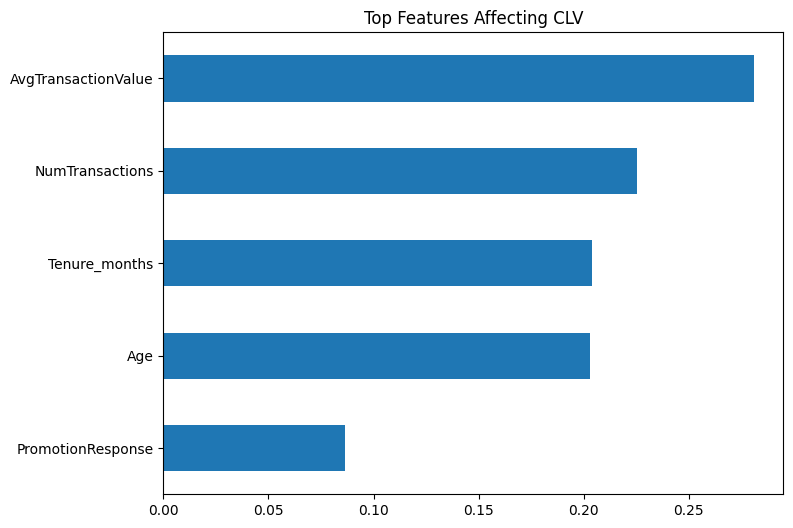

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generate synthetic customer data
np.random.seed(42)
n = 1000

data = pd.DataFrame({
    'CustomerID': ['C'+str(i) for i in range(n)],
    'Age': np.random.randint(18,70,n),
    'Tenure_months': np.random.randint(1,60,n),
    'NumTransactions': np.random.randint(1,100,n),
    'AvgTransactionValue': np.random.uniform(10,500,n),
    'PromotionResponse': np.random.randint(0,5,n),
    'CLV': np.random.uniform(50,20000,n)  # Target variable
})

# 2. Features and target
X = data.drop(['CustomerID','CLV'], axis=1)
y = data['CLV']

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Predictions and Evaluation
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# 6. Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Top Features Affecting CLV")
plt.show()